In [6]:
from train_sae import SAE
import torch
import transformers
import pandas as pd

/home/ubuntu/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
sae = SAE(768, 768*32)
sae.load_state_dict(torch.load('sae.pt'))
sae = sae.to('cuda').to(torch.float16).requires_grad_(False)

In [7]:
df = pd.read_parquet("full.parquet")

In [20]:
clip = transformers.CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14").to("cuda").to(torch.float16).requires_grad_(False)
tokenizer = transformers.AutoTokenizer.from_pretrained("openai/clip-vit-large-patch14")

def get_embeds(batch):
    input_ids = tokenizer(batch, padding="max_length", max_length=77, truncation=True, return_tensors="pt").input_ids.to(clip.device)
    with torch.no_grad():
        return clip(input_ids).pooler_output

/home/ubuntu/miniconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [21]:
texts = df.text.to_list()

In [22]:
text_embs = get_embeds(texts[:100])

In [23]:
out, encoded = sae(text_embs)

In [25]:
import matplotlib.pyplot as plt

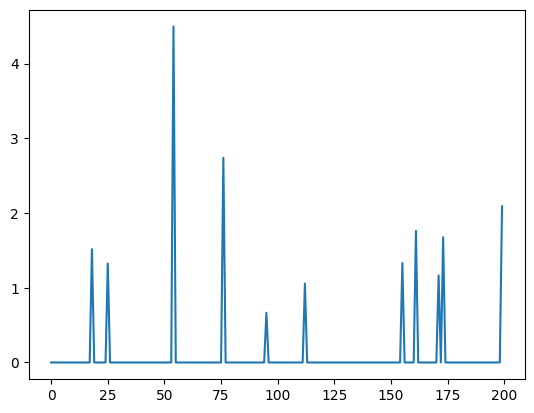

In [32]:
plt.plot(encoded[4][:200].cpu())